In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"/kaggle/input/data-for-tsa/tsa-data.csv")
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month",inplace=True)
data

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


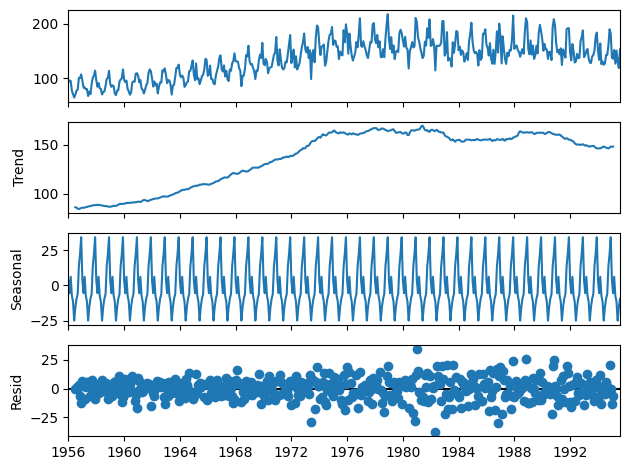

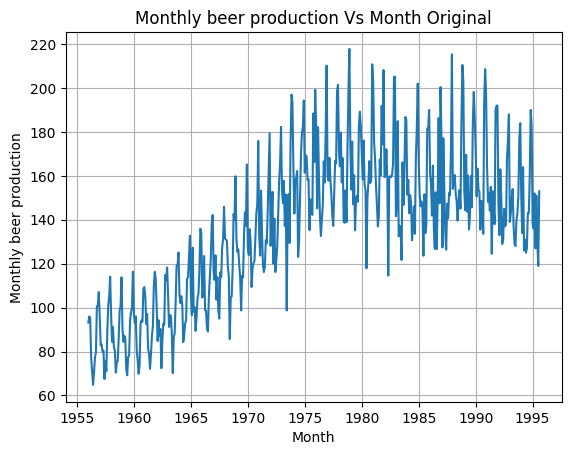

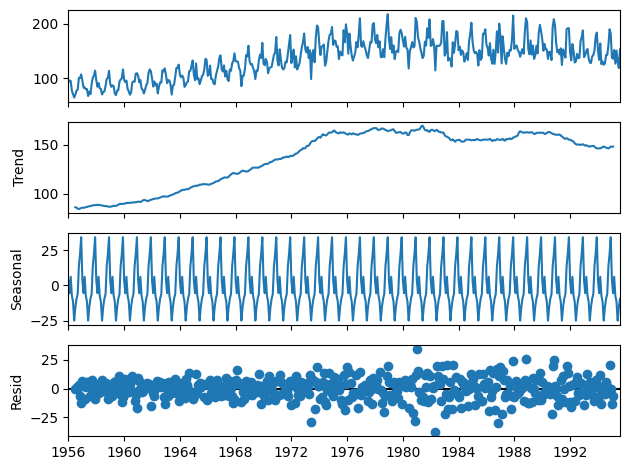

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
result = seasonal_decompose(x=data,model="additive",period=12)
plt.title("Monthly beer production Vs Month Original")
sns.lineplot(data=data,x="Month",y="Monthly beer production")
plt.grid()
result.plot()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


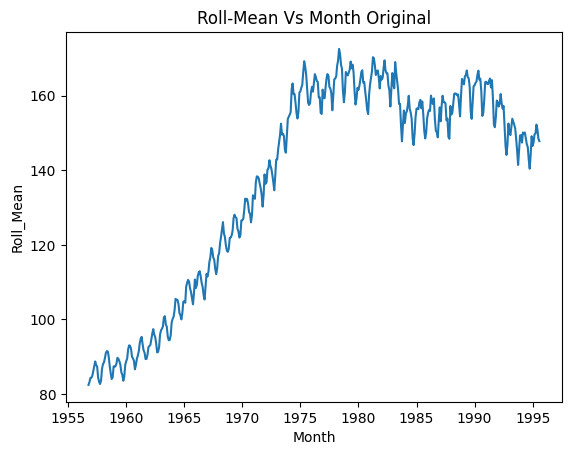

In [7]:
# now lets do a rolling mean to reduce the flaunctuation
import matplotlib.pyplot as plt
import seaborn as sns
data["Roll_Mean"] = data["Monthly beer production"].rolling(window=10).mean()
plt.title("Roll-Mean Vs Month Original")
sns.lineplot(data=data,x="Month",y="Roll_Mean")
plt.show()


statistics     -3.325830
p_value         0.013763
lags_used      15.000000
obv_used      450.000000
dtype: float64
{'critical 1%': -3.444965543297668, 'critical 5%': -2.8679842369272976, 'critical 10%': -2.5702025382716047}
            Monthly beer production  Roll_Mean  Roll_Mean_shift  log-beer  \
Month                                                                       
1956-01-01                     93.2        NaN              NaN       NaN   
1956-02-01                     96.0        NaN              NaN       NaN   
1956-03-01                     95.2        NaN              NaN       NaN   
1956-04-01                     77.1        NaN              NaN       NaN   
1956-05-01                     70.9        NaN              NaN       NaN   
1956-06-01                     64.8        NaN              NaN       NaN   
1956-07-01                     70.1        NaN              NaN       NaN   
1956-08-01                     77.3        NaN              NaN       NaN   
1956-0

/tmp/ipykernel_36/1921042223.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data["first-shift"] = needed_data["Monthly beer production"].diff()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67261D+00    |proj g|=  1.28458D-01

At iterate    1    f=  3.64537D+00    |proj g|=  3.28332D-02

At iterate    2    f=  3.64140D+00    |proj g|=  3.28635D-02

At iterate    3    f=  3.60059D+00    |proj g|=  3.64521D-02

At iterate    4    f=  3.57186D+00    |proj g|=  6.32445D-02

At iterate    5    f=  3.56605D+00    |proj g|=  6.18161D-02

At iterate    6    f=  3.56261D+00    |proj g|=  3.45337D-02

At iterate    7    f=  3.56040D+00    |proj g|=  1.12773D-02

At iterate    8    f=  3.55892D+00    |proj g|=  8.14264D-03

At iterate    9    f=  3.55623D+00    |proj g|=  8.10754D-03

At iterate   10    f=  3.55548D+00    |proj g|=  2.22330D-02

At iterate   11    f=  3.55456D+00    |proj g|=  7.12770D-03

At iterate   12    f=  3.55412D+00    |proj g|=  2.35918D-03

At iterate   13    f=  3.5

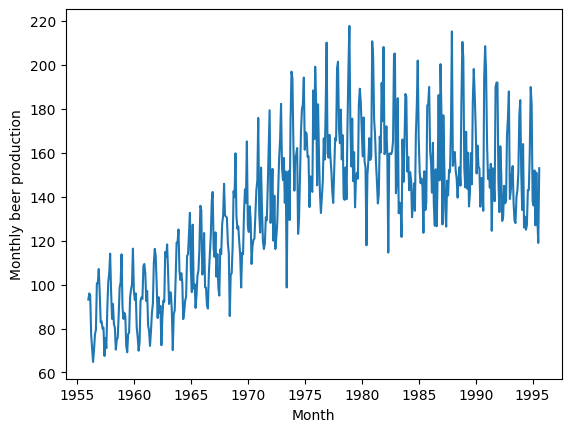

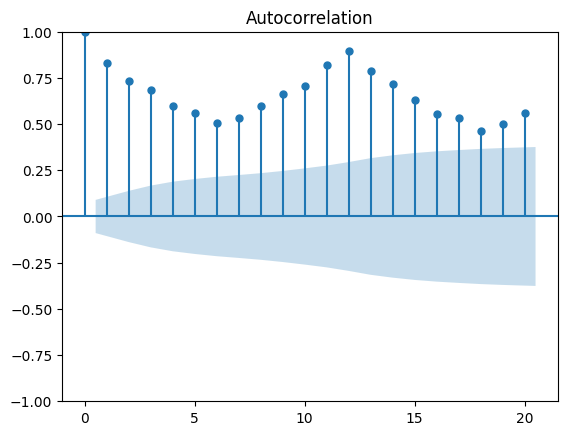

In [8]:
from statsmodels.tsa.stattools import adfuller
def statinarity_check(data):
    tests = adfuller(data,autolag="AIC")
    serie = pd.Series(index=["statistics","p_value","lags_used","obv_used"],data=tests[0:4])
    criticality = {}
    for k, v in tests[4].items():
        criticality[f"critical {k}"] = v
    
    print(serie)
    print(criticality)

data["Roll_Mean_shift"] = data["Roll_Mean"].dropna().diff()
statinarity_check(data["Roll_Mean_shift"].dropna())
# print(data.head(20))

data["log-beer"]=np.log(data["Roll_Mean"].dropna())
data["log-beer-diff"]=np.log(data["Roll_Mean"].dropna()) - np.log(data["Roll_Mean"].dropna()).shift()

print(data.head(20))
statinarity_check(data=data["log-beer-diff"].dropna())

# plt.figure(figsize=(4,4))
# sns.lineplot(data=data,x="Month",y="log-beer-diff")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
needed_data = data[["Monthly beer production"]]
needed_data["first-shift"] = needed_data["Monthly beer production"].diff()
sns.lineplot(data=data,x="Month",y="Monthly beer production")

plot_acf(data["Monthly beer production"].dropna(),lags=20) # Q = 3
# plt.show() # from this plot, a SARIMA model will fit well

train_data = needed_data.iloc[0:round(len(needed_data)*0.7)]
test_data = needed_data.iloc[round(len(needed_data)*0.3):]

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data["Monthly beer production"],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit(disp=True)
res = results.get_forecast(12)


In [9]:

test_result = results.predict(
    start=test_data.index[0], 
    end=test_data.index[-1]  
)

In [10]:
print(test_result)
from sklearn.metrics import mean_absolute_error
data["sarima-pred"] = test_result
data.tail(20)

1967-12-01    142.215570
1968-01-01    121.100796
1968-02-01    115.158670
1968-03-01    126.406092
1968-04-01    113.007611
                 ...    
1995-04-01    155.686536
1995-05-01    150.446281
1995-06-01    141.082516
1995-07-01    146.442691
1995-08-01    161.175526
Freq: MS, Name: predicted_mean, Length: 333, dtype: float64


,Monthly beer production,Roll_Mean,Roll_Mean_shift,log-beer,log-beer-diff,sarima-pred
Month,,,,,,
1994-01-01,151.0,149.4,0.1,5.006627,0.000670,169.174744
1994-02-01,134.0,147.4,-2.0,4.993150,-0.013477,161.410265
1994-03-01,164.0,150.1,2.7,5.011302,0.018152,177.451840
1994-04-01,126.0,149.8,-0.3,5.009301,-0.002001,155.024856
1994-05-01,131.0,150.1,0.3,5.011302,0.002001,149.784600
1994-06-01,125.0,148.6,-1.5,5.001258,-0.010044,140.420836
1994-07-01,127.0,147.0,-1.6,4.990433,-0.010826,145.781011
1994-08-01,143.0,146.2,-0.8,4.984976,-0.005457,160.513846
1994-09-01,143.0,142.8,-3.4,4.961445,-0.023530,159.690183


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

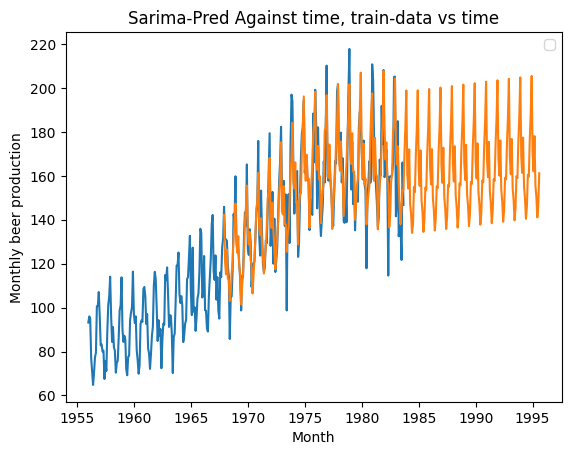

In [11]:
sns.lineplot(data=train_data,x=train_data.index,y="Monthly beer production")
# sns.lineplot(data=test_data,x=test_data.index,y="Monthly beer production")
plt.title("Sarima-Pred Against time, train-data vs time")
sns.lineplot(data=data.dropna(),x=test_data.index,y="sarima-pred")
plt.legend()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Monthly beer production'>

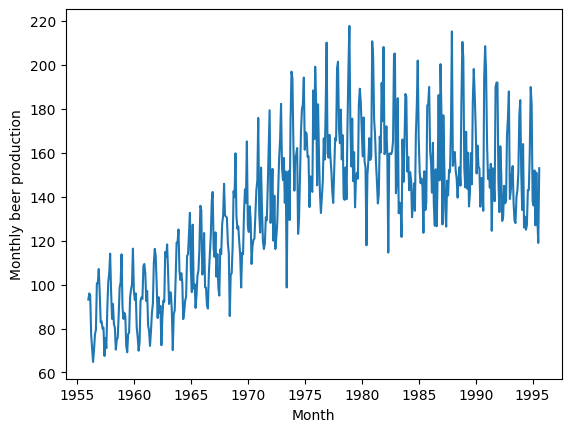

In [12]:
sns.lineplot(data=data,x=data.index,y="Monthly beer production")


In [13]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data["Monthly beer production"],test_result))

13.147153062563172

In [14]:
dates = pd.date_range(start="1995-09-01",end="1996-08-01")
dataframe = pd.DataFrame(data=dates,columns=["dates"])
dataframe.set_index("dates",inplace=True)
predicted = results.predict(start=dataframe.index[0],end=dataframe.index[-1])
predicted

1995-09-01    160.351863
1995-10-01    177.120449
1995-11-01    188.705488
1995-12-01    206.151623
1996-01-01    170.498104
1996-02-01    162.733626
1996-03-01    178.775201
1996-04-01    156.348217
1996-05-01    151.107961
1996-06-01    141.744197
1996-07-01    147.104371
1996-08-01    161.837207
Freq: MS, Name: predicted_mean, dtype: float64

In [15]:
res = results.get_forecast(12).predicted_mean
res

1983-10-01    169.626579
1983-11-01    182.812111
1983-12-01    198.872861
1984-01-01    160.825036
1984-02-01    154.278851
1984-03-01    172.091705
1984-04-01    147.107023
1984-05-01    142.723539
1984-06-01    134.005219
1984-07-01    137.730384
1984-08-01    154.994831
1984-09-01    152.594512
Freq: MS, Name: predicted_mean, dtype: float64

In [63]:
data.iloc[:len(data)]

,Monthly beer production,Roll_Mean,Roll_Mean_shift,log-beer,log-beer-diff,pred,sarima-pred
Month,,,,,,,
1956-01-01,93.2,NaN,NaN,NaN,NaN,NaN,NaN
1956-02-01,96.0,NaN,NaN,NaN,NaN,NaN,NaN
1956-03-01,95.2,NaN,NaN,NaN,NaN,NaN,NaN
1956-04-01,77.1,NaN,NaN,NaN,NaN,NaN,NaN
1956-05-01,70.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1995-04-01,127.0,149.8,0.2,5.009301,0.001336,155.686536,155.686536
1995-05-01,151.0,152.2,2.4,5.025195,0.015894,150.446281,150.446281
1995-06-01,130.0,150.9,-1.3,5.016617,-0.008578,141.082516,141.082516
